In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from pandas.plotting import scatter_matrix
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer

In [78]:
cols = (
    "fLength",
    "fWidth",
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class",
)

filename = "magic04.data"

df = pd.read_csv(filename, names=cols)
xdf = df.drop("class", axis=1)

In [79]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


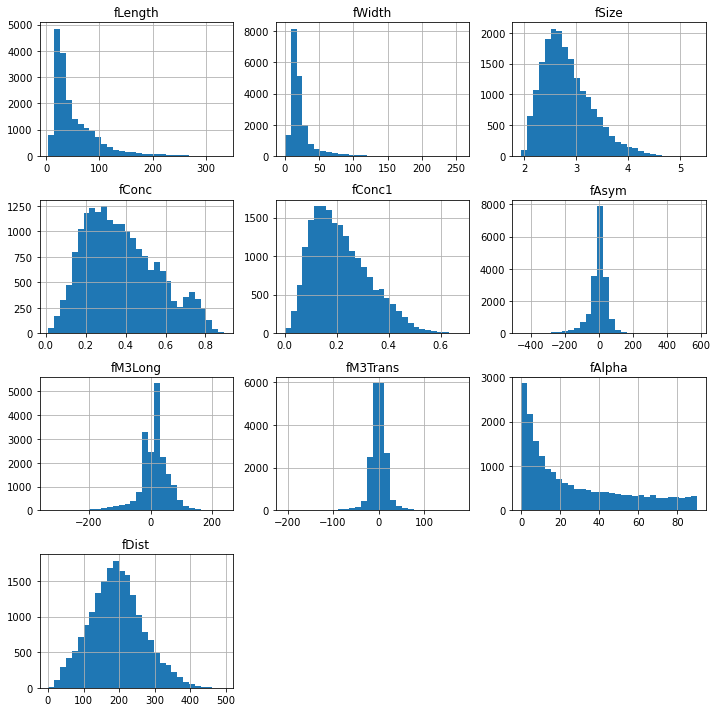

In [80]:

df.drop("class", axis=1).hist(figsize=(10, 10), bins=30)
plt.tight_layout()


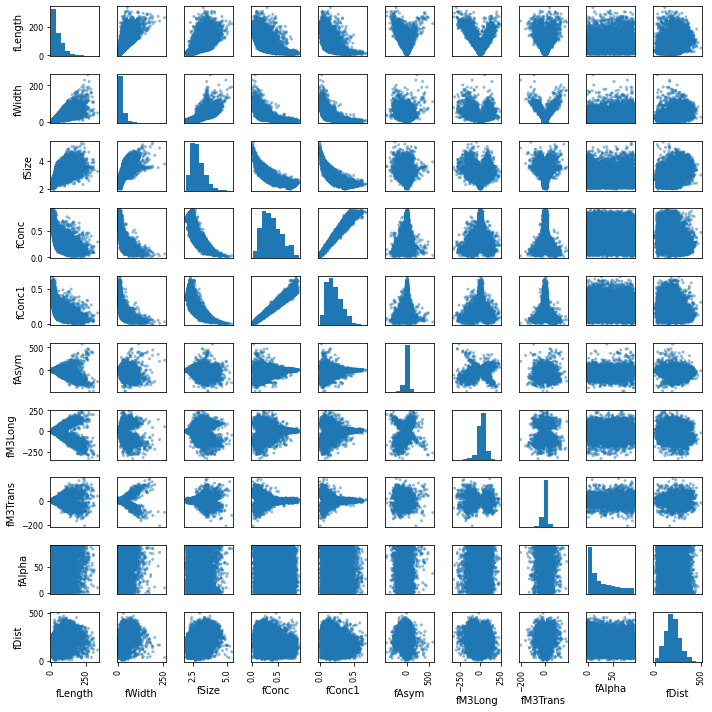

In [81]:
scatter_matrix(
    df.drop("class", axis=1),
    figsize=(10, 10),
    diagonal="hist"
)
plt.tight_layout()
plt.show()

In [17]:
corr_mat = df.corr()

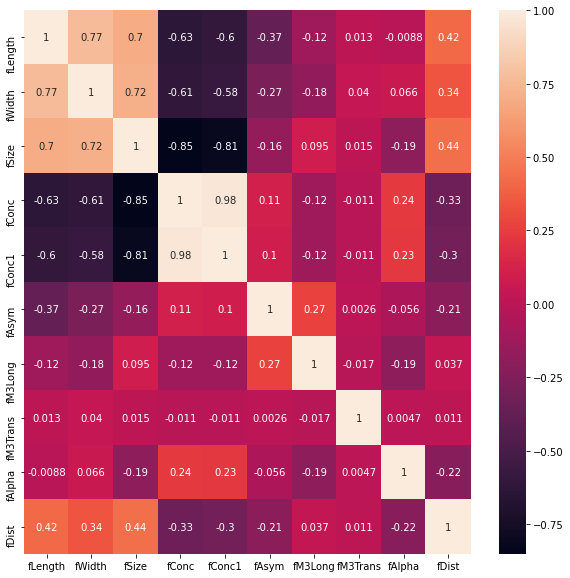

In [21]:
plt.figure(figsize=(10, 10))
sn.heatmap(corr_mat, annot=True)
plt.show()

In [82]:
nonskewedcols = []
for col in xdf.columns:
    thisskew = skew(xdf[col])
    print(col, thisskew)
    if np.abs(thisskew) < 0.5:
        nonskewedcols.append(col)
nonskewedcols.append("fAlpha")
skew_xdf = xdf.drop(nonskewedcols, axis=1)
skew_xdf.head()

fLength 2.0134935150809246
fWidth 3.371362073689998
fSize 0.8754381230627466
fConc 0.48585013377432057
fConc1 0.6856405478083009
fAsym -1.0463589436901524
fM3Long -1.1229894825198337
fM3Trans 0.12011179996396555
fAlpha 0.8508227710257213
fDist 0.22956926973480304


,fLength,fWidth,fSize,fConc1,fAsym,fM3Long
0,28.7967,16.0021,2.6449,0.1982,27.7004,22.0110
1,31.6036,11.7235,2.5185,0.3773,26.2722,23.8238
2,162.0520,136.0310,4.0612,0.0187,116.7410,-64.8580
3,23.8172,9.5728,2.3385,0.3922,27.2107,-6.4633
4,75.1362,30.9205,3.1611,0.1832,-5.5277,28.5525


In [83]:
pt = PowerTransformer(method="yeo-johnson", standardize=True)
unskew_xdf = pd.DataFrame(
    pt.fit_transform(skew_xdf),
    columns=skew_xdf.columns,
)

array([[<AxesSubplot:title={'center':'fLength'}>,
        <AxesSubplot:title={'center':'fWidth'}>],
       [<AxesSubplot:title={'center':'fSize'}>,
        <AxesSubplot:title={'center':'fConc1'}>],
       [<AxesSubplot:title={'center':'fAsym'}>,
        <AxesSubplot:title={'center':'fM3Long'}>]], dtype=object)

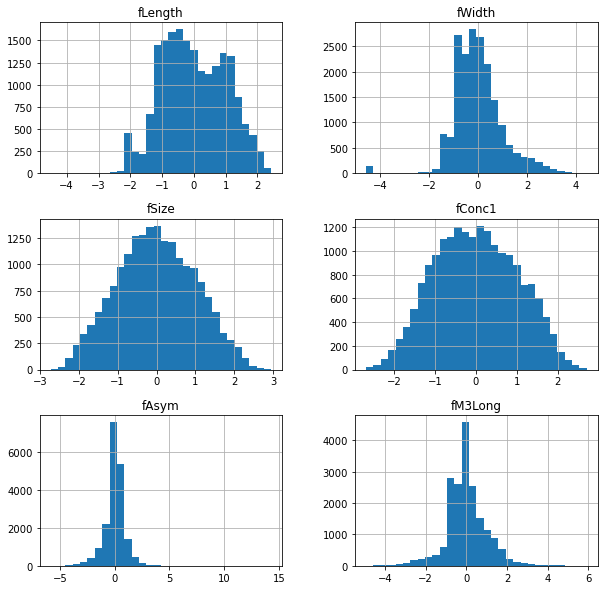

In [84]:
unskew_xdf.hist(figsize=(10, 10), bins=30)

In [85]:
for col in unskew_xdf.columns:
    print(col, skew(unskew_xdf[col]))

fLength 0.055832261197039094
fWidth 0.02535989911293052
fSize 0.04243957429829017
fConc1 0.051657927141248526
fAsym 0.9689236435733158
fM3Long 0.16786328108877557


array([[<AxesSubplot:title={'center':'fLength'}>,
        <AxesSubplot:title={'center':'fWidth'}>],
       [<AxesSubplot:title={'center':'fSize'}>,
        <AxesSubplot:title={'center':'fConc1'}>],
       [<AxesSubplot:title={'center':'fAsym'}>,
        <AxesSubplot:title={'center':'fM3Long'}>]], dtype=object)

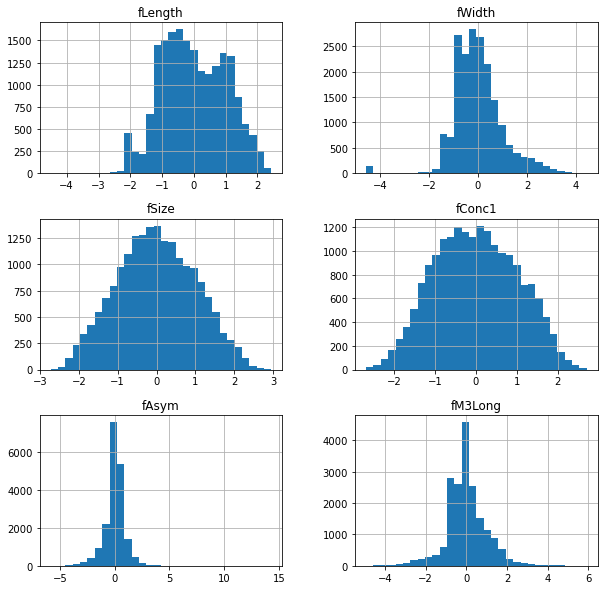

In [86]:
unskew_xdf.hist(figsize=(10, 10), bins=30)

In [87]:
for col in unskew_xdf.columns:
    print(col, skew(unskew_xdf[col]))

fLength 0.055832261197039094
fWidth 0.02535989911293052
fSize 0.04243957429829017
fConc1 0.051657927141248526
fAsym 0.9689236435733158
fM3Long 0.16786328108877557


array([[<AxesSubplot:title={'center':'fLength'}>,
        <AxesSubplot:title={'center':'fWidth'}>,
        <AxesSubplot:title={'center':'fSize'}>],
       [<AxesSubplot:title={'center':'fConc1'}>,
        <AxesSubplot:title={'center':'fAsym'}>,
        <AxesSubplot:title={'center':'fM3Long'}>],
       [<AxesSubplot:title={'center':'fAlpha'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

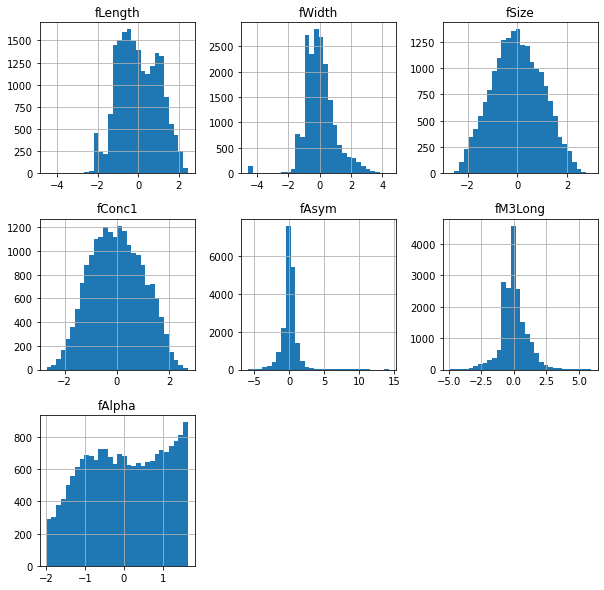

In [68]:
unskew_xdf.hist(figsize=(10, 10), bins=30)

In [67]:
for col in unskew_xdf.columns:
    print(col, skew(unskew_xdf[col]))

fLength 0.055832261197039094
fWidth 0.02535989911293052
fSize 0.04243957429829017
fConc1 0.051657927141248526
fAsym 0.9689236435733158
fM3Long 0.16786328108877557
fAlpha -0.08707637882588591


In [88]:
skewedcols = [col for col in xdf.columns if col not in nonskewedcols]
nonskew_xdf = xdf.drop(skewedcols, axis=1)

In [90]:
pd.concat([nonskew_xdf, unskew_xdf], axis=1)

,fConc,fM3Trans,fAlpha,fDist,fLength,fWidth,fSize,fConc1,fAsym,fM3Long
0,0.3918,-8.2027,40.0920,81.8828,-0.490116,-0.191899,-0.256508,-0.004515,0.513540,0.133243
1,0.5303,-9.9574,6.3609,205.2610,-0.336013,-0.659873,-0.597211,1.391486,0.482344,0.176664
2,0.0374,-45.2160,76.9600,256.7880,1.786169,3.322470,2.032731,-2.352692,2.574635,-1.356991
3,0.6147,-7.1513,10.4490,116.7370,-0.817147,-0.956291,-1.147733,1.480958,0.502832,-0.475912
4,0.3168,21.8393,4.6480,356.4620,0.917090,0.841690,0.838688,-0.155571,-0.149727,0.290934
...,...,...,...,...,...,...,...,...,...,...
19015,0.5857,2.8766,2.4229,106.8258,-1.010272,-0.764924,-0.331134,1.488021,0.245873,-0.112545
19016,0.5351,-2.9632,86.7975,247.4560,-0.481490,-1.458957,-1.390247,0.703485,0.720770,-0.074350
19017,0.1417,-9.4662,30.2987,256.5166,0.922300,1.541980,1.295712,-1.766721,-0.208485,0.598869
19018,0.0944,-63.8389,84.6874,408.3166,1.475459,2.345644,1.964317,-1.566814,0.051151,-1.762509


In [92]:
len(unskew_xdf)

19020